### Libraries

In [49]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install torch

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import torch

     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.7 MB 326.8 kB/s eta 0:00:18
      --------------------------------------- 0.1/5.7 MB 655.4 kB/s eta 0:00:09
     - -------------------------------------- 0.3/5.7 MB 1.4 MB/s eta 0:00:04
     --- ------------------------------------ 0.5/5.7 MB 2.1 MB/s eta 0:00:03
     ----- ---------------------------------- 0.8/5.7 MB 3.0 MB/s eta 0:00:02
     ------- -------------------------------- 1.0/5.7 MB 3.5 MB/s eta 0:00:02
     --------- ------------------------------ 1.4/5.7 MB 4.1 MB/s eta 0:00:02
     ------------- -------------------------- 1.9/5.7 MB 4.8 MB/s eta 0:00:01
     ---------------- ----------------------- 2.3/5.7 MB 5.1 MB/s eta 0:00:01
     ------------------- -------------------- 2.8/5.7 MB 5.7 MB/s eta 0:00:01
   

### Functions for the project

In [44]:
def remove_special_characters(text):
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    return text

### Uploading and pre procesing data for the model

In [45]:
data = pd.read_json('data/Cell_Phones_and_Accessories_5.json', lines=True)
data = data.drop(columns=['reviewerID','asin','reviewerName','helpful','unixReviewTime','reviewTime','summary'])
data['reviewText'] = data['reviewText'].apply(remove_special_characters)

### Deeper look for overall data

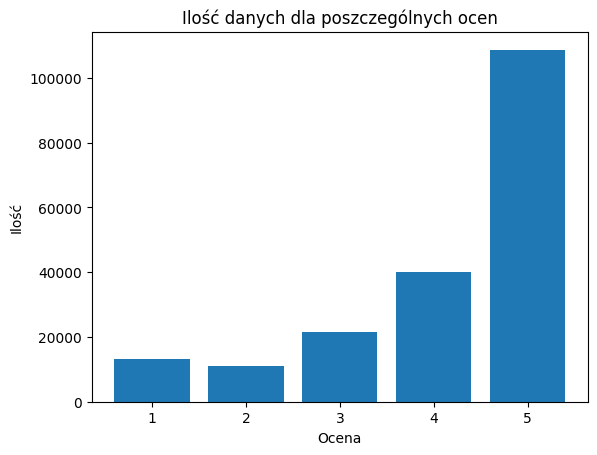

prc of overall 1:  6.829391222954243 %  and there is 13279
prc of overall 2:  5.690216468918273 %  and there is 11064
prc of overall 3:  11.026080158815875 %  and there is 21439
prc of overall 4:  20.5684044867542 %  and there is 39993
prc of overall 5:  55.88590766255741 %  and there is 108664


In [46]:
overall_ratings = data['overall']

rating_counts = overall_ratings.value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Ocena')
plt.ylabel('Ilość')
plt.title('Ilość danych dla poszczególnych ocen')
plt.xticks(range(1, 6))
plt.show()

number_of_overall_1 = rating_counts[1]
number_of_overall_2 = rating_counts[2]
number_of_overall_3 = rating_counts[3]
number_of_overall_4 = rating_counts[4]
number_of_overall_5 = rating_counts[5]

print('prc of overall 1: ', number_of_overall_1/sum(rating_counts)*100,'%',' and there is',number_of_overall_1)
print('prc of overall 2: ', number_of_overall_2/sum(rating_counts)*100, '%',' and there is',number_of_overall_2)
print('prc of overall 3: ', number_of_overall_3/sum(rating_counts)*100, '%',' and there is',number_of_overall_3)
print('prc of overall 4: ', number_of_overall_4/sum(rating_counts)*100, '%',' and there is',number_of_overall_4)
print('prc of overall 5: ', number_of_overall_5/sum(rating_counts)*100, '%',' and there is',number_of_overall_5)

### Making equls proportions for the data by the overall rate number

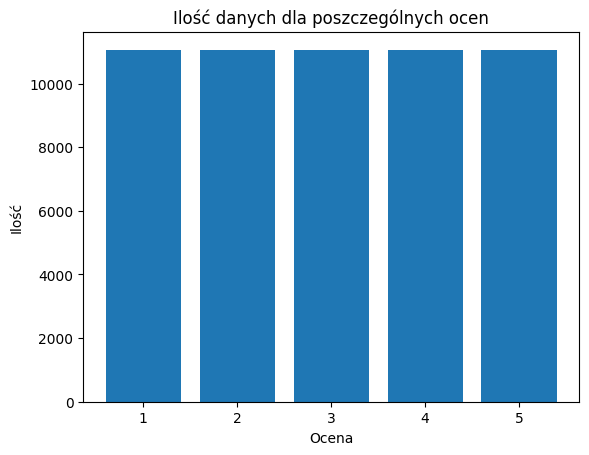

In [47]:
df_1 = data[data['overall'] == 1]
df_2 = data[data['overall'] == 2]
df_3 = data[data['overall'] == 3]
df_4 = data[data['overall'] == 4]
df_5 = data[data['overall'] == 5]

sample_size = 11064
df_1_sampled = df_1.sample(n=sample_size, random_state=42)
df_3_sampled = df_3.sample(n=sample_size, random_state=42)
df_4_sampled = df_4.sample(n=sample_size, random_state=42)
df_5_sampled = df_5.sample(n=sample_size, random_state=42)

final_df = pd.concat([df_1_sampled, df_2, df_3_sampled, df_4_sampled, df_5_sampled])

overall_ratings = final_df['overall']

rating_counts = overall_ratings.value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('quantity')
plt.title('Amount of data for each grade')
plt.xticks(range(1, 6))
plt.show()